In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [8]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


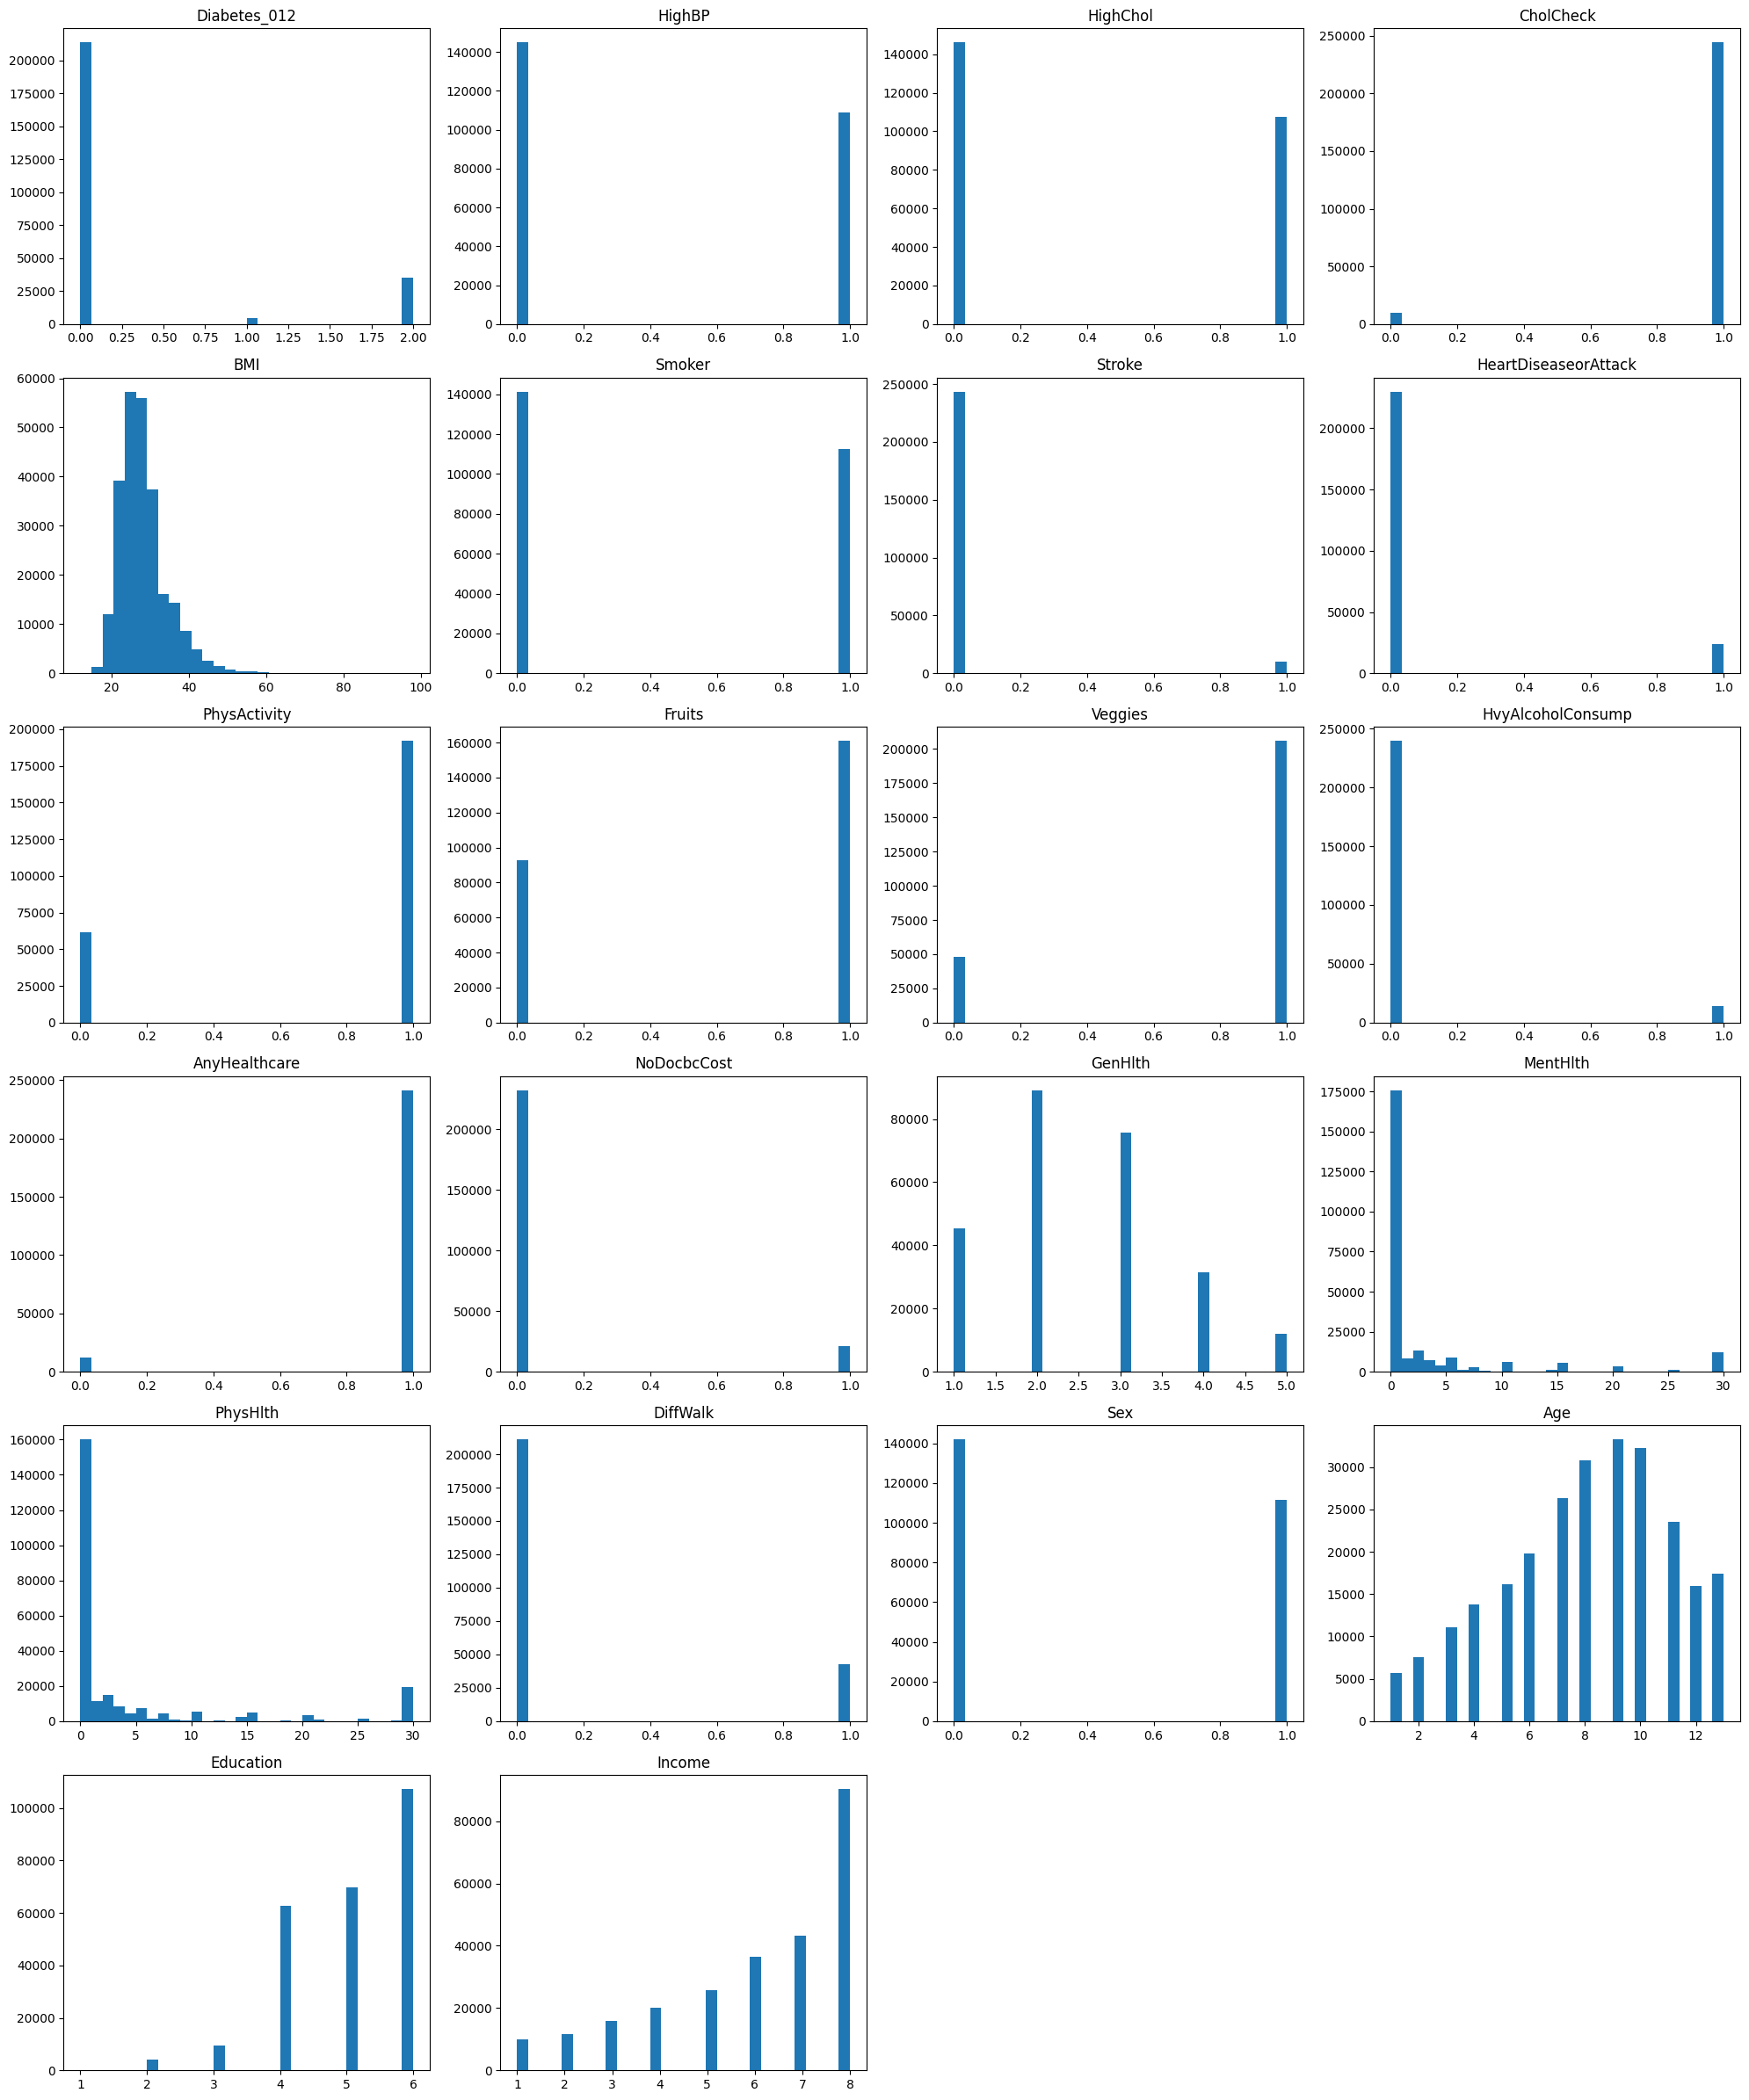

In [9]:
# visualize features
num_cols = len(df.columns)
ncols = 4                      
nrows = math.ceil(num_cols / ncols)

plt.figure(figsize=(20, 4 * nrows))

for i, col in enumerate(df.columns, start=1):
    plt.subplot(nrows, ncols, i)
    plt.hist(df[col].dropna(), bins=30)
    plt.title(col)
    plt.tight_layout()

plt.show()

In [16]:
from sklearn.model_selection import train_test_split

# 2. Create binary label: 0 = no diabetes, 1 = pre-diabetes or diabetes
df["Diabetes_binary"] = (df["Diabetes_012"] > 0).astype(int)

df_multi_rows, df_binary_rows = train_test_split(
    df,
    test_size=0.5,
    random_state=42,
    stratify=df["Diabetes_012"]
)

multiclass_df = df_multi_rows.drop(columns=["Diabetes_binary"]) 
multiclass_df = multiclass_df[
    [col for col in multiclass_df.columns if col != "Diabetes_012"] + ["Diabetes_012"]
]

binary_df = df_binary_rows.drop(columns=["Diabetes_012"])
binary_df = binary_df[
    [col for col in binary_df.columns if col != "Diabetes_binary"] + ["Diabetes_binary"]
]

# multiclass_df.to_csv("multiclass_subset.csv", index=False)
# binary_df.to_csv("binary_subset.csv", index=False)

Multiclass subset rows: 126840
Binary subset rows: 126840
Saved multiclass_subset_half.csv and binary_subset_half.csv


In [170]:
from sklearn.model_selection import train_test_split

# This cell already splits both classification problem datasets into 90% training and 10% validation as required

multiclass_df = pd.read_csv("multiclass_subset.csv")
binary_df = pd.read_csv("binary_subset.csv")

# Multiclass
X_multi = multiclass_df.iloc[:, :-1]
y_multi = multiclass_df.iloc[:, -1]

# Binary
X_binary = binary_df.iloc[:, :-1]
y_binary = binary_df.iloc[:, -1]

X_train_multi, X_val_multi, y_train_multi, y_val_multi = train_test_split(
    X_multi, y_multi, 
    test_size=0.10, 
    random_state=42, 
    stratify=y_multi
)

X_train_bin, X_val_bin, y_train_bin, y_val_bin = train_test_split(
    X_binary, y_binary, 
    test_size=0.10, 
    random_state=42, 
    stratify=y_binary
)
#### Section is to save the training and validation as a csv file ####
# train_multiclass = pd.concat([X_train_multi, y_train_multi], axis=1)
# val_multiclass = pd.concat([X_val_multi, y_val_multi], axis=1)

# train_binary = pd.concat([X_train_bin, y_train_bin], axis=1)
# val_binary = pd.concat([X_val_bin, y_val_bin], axis=1)

# train_multiclass.to_csv("multiclass_train.csv", index=False)
# val_multiclass.to_csv("multiclass_validation.csv", index=False)

# train_binary.to_csv("binary_train.csv", index=False)
# val_binary.to_csv("binary_validation.csv", index=False)


2790480

## k-Nearest Neighbors Model

### KNN multi-class classification

Best params: {'n_neighbors': 35}
Best CV accuracy: 0.8443007733586881


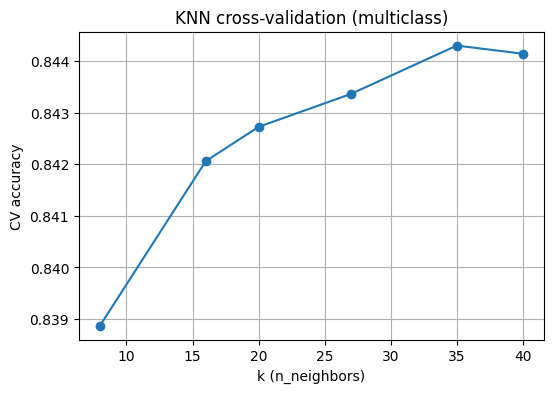

In [165]:
# kNN - multi-class classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import time

knn = KNeighborsClassifier()
knn_parameters_multi = {"n_neighbors": [8, 16, 20, 27, 35, 40]}

# k-fold cross validation
grid = GridSearchCV(
    estimator=knn,
    param_grid=knn_parameters_multi,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    return_train_score=True,
)

grid.fit(X_train_multi, y_train_multi)

print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

# visualize cross validation results
k_values = [d["n_neighbors"] for d in grid.cv_results_["params"]]
mean_scores = grid.cv_results_["mean_test_score"]

plt.figure(figsize=(6,4))
plt.plot(k_values, mean_scores, marker="o")
plt.xlabel("k (n_neighbors)")
plt.ylabel("CV accuracy")
plt.title("KNN cross-validation (multiclass)")
plt.grid(True)
plt.show()

In [166]:
# train model with the best neighbor parameter
best_k = grid.best_params_["n_neighbors"]

start_train = time.time()
best_knn_multi = KNeighborsClassifier(n_neighbors=best_k)
best_knn_multi.fit(X_train_multi, y_train_multi)
train_time = time.time() - start_train

In [167]:
# predict on validation set
start_pred = time.time()
y_pred_multi = best_knn_multi.predict(X_val_multi)
pred_time = time.time() - start_pred

y_train_pred_knn_multi = best_knn_multi.predict(X_train)

# Calculate accuracies
knn_train_accuracy = accuracy_score(y_train, y_train_pred_knn_multi)

# performance + runtime
val_accuracy = accuracy_score(y_val_multi, y_pred_multi)

print(f"Training accuracy (multiclass KNN Trained): {knn_train_accuracy:.4f}")
print(f"Validation accuracy (multiclass KNN, k={best_k}): {val_accuracy:.4f}")
print(f"Training time: {train_time:.4f} seconds")
print(f"Prediction time: {pred_time:.4f} seconds")
print(f"Total time (train + predict): {train_time + pred_time:.4f} seconds")

Training accuracy (multiclass KNN Trained): 0.8294
Validation accuracy (multiclass KNN, k=35): 0.8421
Training time: 0.0125 seconds
Prediction time: 0.9340 seconds
Total time (train + predict): 0.9465 seconds


### KNN binary classification

Best params: {'n_neighbors': 35}
Best CV accuracy: 0.8448351429750861


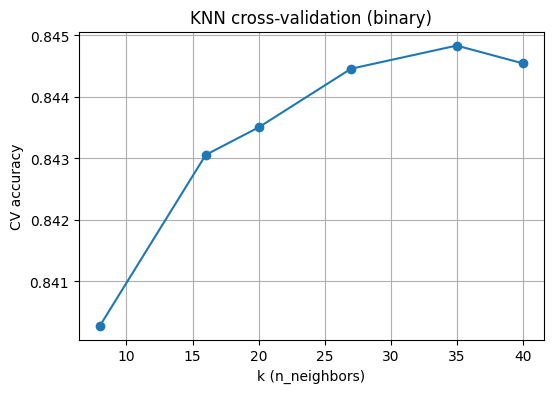

In [67]:
# kNN - binary classification
knn = KNeighborsClassifier()
knn_parameters_bin = {"n_neighbors": [8, 16, 20, 27, 35, 40]}

# k-fold cross validation
grid = GridSearchCV(
    estimator=knn,
    param_grid=knn_parameters_bin,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    return_train_score=True,
)

grid.fit(X_train_bin, y_train_bin)

print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

# visualize cross validation results
k_values = [d["n_neighbors"] for d in grid.cv_results_["params"]]
mean_scores = grid.cv_results_["mean_test_score"]

plt.figure(figsize=(6,4))
plt.plot(k_values, mean_scores, marker="o")
plt.xlabel("k (n_neighbors)")
plt.ylabel("CV accuracy")
plt.title("KNN cross-validation (binary)")
plt.grid(True)
plt.show()

In [68]:
# train model with the best neighbor parameter
best_k = grid.best_params_["n_neighbors"]

start_train = time.time()
best_knn_bin = KNeighborsClassifier(n_neighbors=best_k)
best_knn_bin.fit(X_train_bin, y_train_bin)
train_time = time.time() - start_train

In [99]:
start_pred = time.time()
y_pred_bin = best_knn_bin.predict(X_val_bin)
pred_time = time.time() - start_pred

y_train_pred_knn_bib = best_knn_bin.predict(X_train)

knn_train_accuracy = accuracy_score(y_train, y_train_pred_knn_bib)

val_accuracy = accuracy_score(y_val_bin, y_pred_bin)

print(f"Training accuracy (binary KNN Trained): {knn_train_accuracy:.4f}")
print(f"Validation accuracy (binary KNN, k={best_k}): {val_accuracy:.4f}")
print(f"Training time: {train_time:.4f} seconds")
print(f"Prediction time: {pred_time:.4f} seconds")
print(f"Total time (train + predict): {train_time + pred_time:.4f} seconds")

Training accuracy (binary KNN Trained): 0.8501
Validation accuracy (binary KNN, k=35): 0.8439
Training time: 0.0551 seconds
Prediction time: 1.2747 seconds
Total time (train + predict): 1.3298 seconds


## Artificial Neural Networks (ANN)

In [100]:
# ANN
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

def run_ann_with_cv(X_train, y_train, X_val, y_val, problem_name="multiclass"):

    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("mlp", MLPClassifier(
            max_iter=200,
            random_state=42
        )),
    ])

    param_grid = {
        "mlp__hidden_layer_sizes": [(5,), (10,), (25,), (50,), (100,)]
    }

    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        cv=5,
        scoring="accuracy",
        n_jobs=-1,
        return_train_score=True,
    )

    grid.fit(X_train, y_train)

    print(f"\n=== {problem_name.upper()} ANN – Cross Validation Results ===")
    print("Best params:", grid.best_params_)
    print("Best mean CV accuracy:", grid.best_score_)

    hidden_sizes = [p["mlp__hidden_layer_sizes"][0] for p in grid.cv_results_["params"]]
    mean_scores = grid.cv_results_["mean_test_score"]

    plt.figure(figsize=(6, 4))
    plt.plot(hidden_sizes, mean_scores, marker="o")
    plt.xlabel("Number of hidden units")
    plt.ylabel("CV accuracy")
    plt.title(f"ANN cross-validation – {problem_name}")
    plt.grid(True)
    plt.show()

    best_hidden = grid.best_params_["mlp__hidden_layer_sizes"]

    best_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("mlp", MLPClassifier(
            hidden_layer_sizes=best_hidden,
            max_iter=200,
            random_state=42
        )),
    ])

    start_train = time.time()
    best_pipe.fit(X_train, y_train)
    train_time = time.time() - start_train

    start_pred = time.time()
    y_pred = best_pipe.predict(X_val)
    pred_time = time.time() - start_pred

    y_train_pred = best_pipe.predict(X_train)

    ann_train_accuracy = accuracy_score(y_train, y_train_pred)

    acc = accuracy_score(y_val, y_pred)
    print(f"\n=== {problem_name.upper()} ANN – Final Validation Performance ===")
    print(f"Training accuracy: {ann_train_accuracy:.4f}")
    print(f"Hidden units: {best_hidden}")
    print(f"Validation accuracy: {acc:.4f}")
    print(f"Training time:  {train_time:.4f} seconds")
    print(f"Prediction time: {pred_time:.4f} seconds")
    print("\nClassification report:\n", classification_report(y_val, y_pred))

    return best_pipe

### ANN multi-class classification

/Users/jp/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/jp/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/jp/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/jp/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/jp/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.


=== MULTICLASS ANN – Cross Validation Results ===
Best params: {'mlp__hidden_layer_sizes': (5,)}
Best mean CV accuracy: 0.8493727911376597


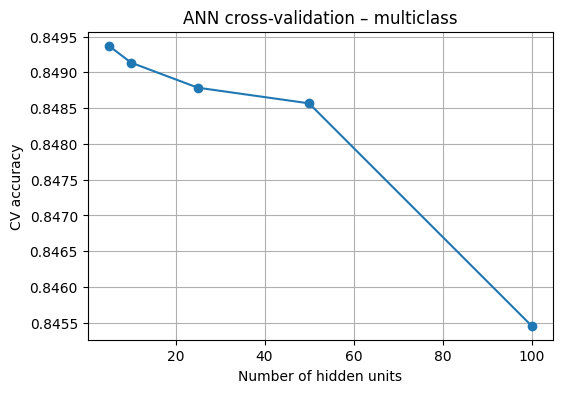


=== MULTICLASS ANN – Final Validation Performance ===
Training accuracy: 0.8498
Hidden units: (5,)
Validation accuracy: 0.8489
Training time:  3.4165 seconds
Prediction time: 0.0154 seconds

Classification report:
               precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     10685
         1.0       0.00      0.00      0.00       232
         2.0       0.54      0.21      0.30      1767

    accuracy                           0.85     12684
   macro avg       0.47      0.39      0.41     12684
weighted avg       0.81      0.85      0.81     12684



/Users/jp/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jp/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jp/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [101]:
# Multiclass ANN
best_ann_multi = run_ann_with_cv(
    X_train_multi, y_train_multi,
    X_val_multi, y_val_multi,
    problem_name="multiclass"
)

### ANN binary classification


=== BINARY ANN – Cross Validation Results ===
Best params: {'mlp__hidden_layer_sizes': (10,)}
Best mean CV accuracy: 0.8512386568263064


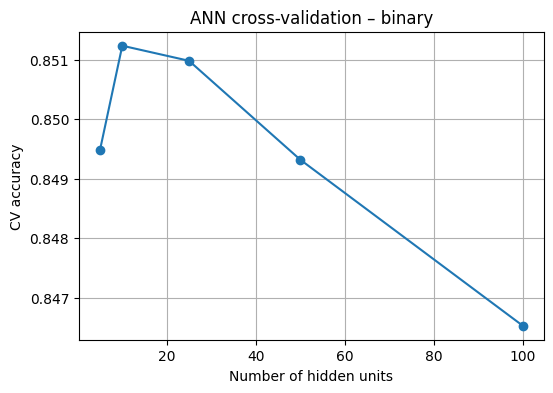


=== BINARY ANN – Final Validation Performance ===
Training accuracy: 0.8523
Hidden units: (10,)
Validation accuracy: 0.8482
Training time:  1.9276 seconds
Prediction time: 0.0212 seconds

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92     10685
           1       0.56      0.17      0.26      1999

    accuracy                           0.85     12684
   macro avg       0.71      0.57      0.59     12684
weighted avg       0.81      0.85      0.81     12684



In [ ]:
# Binary ANN
best_ann_bin = run_ann_with_cv(
    X_train_bin, y_train_bin,
    X_val_bin, y_val_bin,
    problem_name="binary"
)

# Dimension Reduction

In [103]:
import pandas as pd
from sklearn.decomposition import PCA

X_train = X_train_multi.copy()
y_train = y_train_multi.copy()
X_val   = X_val_multi.copy()
y_val   = y_val_multi.copy()

n_components = X_train.shape[1] // 2
pca_multi = PCA(n_components=n_components)

pca_multi.fit(X_train)

X_train_multi_pca = pca_multi.transform(X_train)
X_val_multi_pca   = pca_multi.transform(X_val)

train_multi_pca = pd.concat([
    pd.DataFrame(X_train_multi_pca),
    y_train.reset_index(drop=True)
], axis=1)

val_multi_pca = pd.concat([
    pd.DataFrame(X_val_multi_pca),
    y_val.reset_index(drop=True)
], axis=1)

# # Save files
# train_multi_pca.to_csv("multiclass_train_pca.csv", index=False)
# val_multi_pca.to_csv("multiclass_val_pca.csv", index=False)

In [104]:
# Separate features and labels
X_train = X_train_bin.copy()
y_train = y_train_bin.copy()
X_val   = X_val_bin.copy()
y_val   = y_val_bin.copy()

# Number of PCA components = half of original features
n_components = X_train.shape[1] // 2
pca_bin = PCA(n_components=n_components)

# Fit on training
pca_bin.fit(X_train)

# Transform both sets
X_train_bin_pca = pca_bin.transform(X_train)
X_val_bin_pca   = pca_bin.transform(X_val)

# Combine with labels
train_bin_pca = pd.concat([
    pd.DataFrame(X_train_bin_pca),
    y_train.reset_index(drop=True)
], axis=1)

val_bin_pca = pd.concat([
    pd.DataFrame(X_val_bin_pca),
    y_val.reset_index(drop=True)
], axis=1)

# # Save files
# train_bin_pca.to_csv("binary_train_pca.csv", index=False)
# val_bin_pca.to_csv("binary_val_pca.csv", index=False)


In [105]:
# load DR datasets

# multi class
train_multi_pca = pd.read_csv("multiclass_train_pca_knn_ann.csv")
val_multi_pca   = pd.read_csv("multiclass_val_pca_knn_ann.csv")

X_train_multi_pca = train_multi_pca.iloc[:, :-1]
y_train_multi     = train_multi_pca.iloc[:, -1]

X_val_multi_pca   = val_multi_pca.iloc[:, :-1]
y_val_multi       = val_multi_pca.iloc[:, -1]

# binary
train_bin_pca = pd.read_csv("binary_train_pca_knn_ann.csv")
val_bin_pca   = pd.read_csv("binary_val_pca_knn_ann.csv")

X_train_bin_pca = train_bin_pca.iloc[:, :-1]
y_train_bin     = train_bin_pca.iloc[:, -1]

X_val_bin_pca   = val_bin_pca.iloc[:, :-1]
y_val_bin       = val_bin_pca.iloc[:, -1]


## KNN

### KNN multi-class

/Users/jp/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/jp/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/jp/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/jp/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/jp/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.

Best params: {'n_neighbors': 50}
Best CV accuracy: 0.8442044192854619


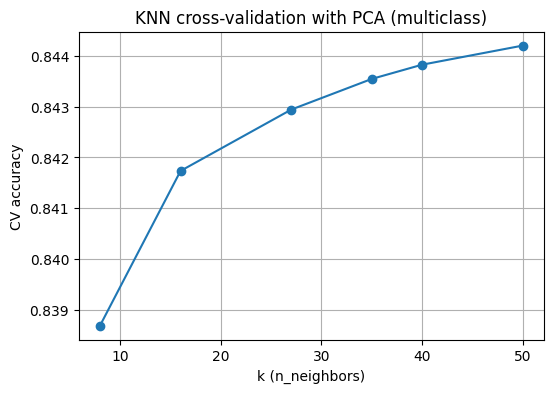

In [106]:
knn = KNeighborsClassifier()
knn_parameters_multi = {"n_neighbors": [8, 16, 27, 35, 40, 50]}

grid = GridSearchCV(
    estimator=knn,
    param_grid=knn_parameters_multi,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    return_train_score=True,
)

grid.fit(X_train_multi_pca, y_train_multi)

print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

k_values = [d["n_neighbors"] for d in grid.cv_results_["params"]]
mean_scores = grid.cv_results_["mean_test_score"]

plt.figure(figsize=(6, 4))
plt.plot(k_values, mean_scores, marker="o")
plt.xlabel("k (n_neighbors)")
plt.ylabel("CV accuracy")
plt.title("KNN cross-validation with PCA (multiclass)")
plt.grid(True)
plt.show()

In [107]:
best_k = grid.best_params_["n_neighbors"]

start_train = time.time()
best_knn_multi_pca = KNeighborsClassifier(n_neighbors=best_k)
best_knn_multi_pca.fit(X_train_multi_pca, y_train_multi)
train_time = time.time() - start_train

In [111]:
start_pred = time.time()
y_pred_multi_pca = best_knn_multi_pca.predict(X_val_multi_pca)
pred_time = time.time() - start_pred

y_train_pred_knn_multi_pca = best_knn_multi_pca.predict(X_train_multi_pca)

knn_train_accuracy_pca = accuracy_score(y_train_multi, y_train_pred_knn_multi_pca)
val_accuracy_pca       = accuracy_score(y_val_multi,  y_pred_multi_pca)

print(f"Training accuracy (multiclass KNN + PCA, trained): {knn_train_accuracy_pca:.4f}")
print(f"Validation accuracy (multiclass KNN + PCA, k={best_k}): {val_accuracy_pca:.4f}")
print(f"Training time: {train_time:.4f} seconds")
print(f"Prediction time: {pred_time:.4f} seconds")
print(f"Total time (train + predict): {train_time + pred_time:.4f} seconds")

Training accuracy (multiclass KNN + PCA, trained): 0.8474
Validation accuracy (multiclass KNN + PCA, k=50): 0.8439
Training time: 0.0812 seconds
Prediction time: 0.8354 seconds
Total time (train + predict): 0.9165 seconds


### KNN binary

/Users/jp/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/jp/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/jp/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/jp/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/jp/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.

Best params: {'n_neighbors': 35}
Best CV accuracy: 0.8445811054855799


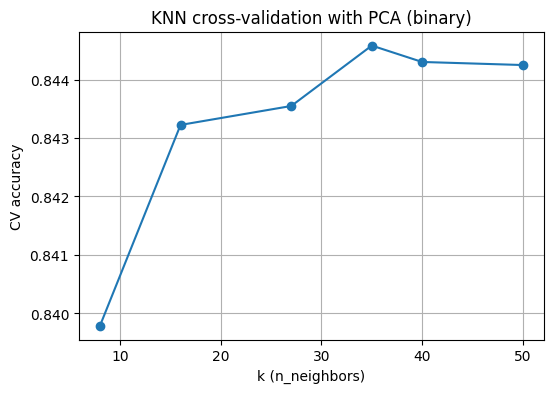

In [113]:
knn = KNeighborsClassifier()
knn_parameters_bin = {"n_neighbors": [8, 16, 27, 35, 40, 50]}

grid = GridSearchCV(
    estimator=knn,
    param_grid=knn_parameters_bin,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    return_train_score=True,
)

grid.fit(X_train_bin_pca, y_train_bin)

print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

k_values = [d["n_neighbors"] for d in grid.cv_results_["params"]]
mean_scores = grid.cv_results_["mean_test_score"]

plt.figure(figsize=(6, 4))
plt.plot(k_values, mean_scores, marker="o")
plt.xlabel("k (n_neighbors)")
plt.ylabel("CV accuracy")
plt.title("KNN cross-validation with PCA (binary)")
plt.grid(True)
plt.show()

In [114]:
best_k = grid.best_params_["n_neighbors"]

start_train = time.time()
best_knn_bin_pca = KNeighborsClassifier(n_neighbors=best_k)
best_knn_bin_pca.fit(X_train_bin_pca, y_train_bin)
train_time = time.time() - start_train

In [115]:
start_pred = time.time()
y_pred_bin_pca = best_knn_bin_pca.predict(X_val_bin_pca)
pred_time = time.time() - start_pred

y_train_pred_knn_bin_pca = best_knn_bin_pca.predict(X_train_bin_pca)

knn_train_accuracy_pca_bin = accuracy_score(y_train_bin, y_train_pred_knn_bin_pca)
val_accuracy_pca_bin       = accuracy_score(y_val_bin,  y_pred_bin_pca)

print(f"Training accuracy (binary KNN + PCA, trained): {knn_train_accuracy_pca_bin:.4f}")
print(f"Validation accuracy (binary KNN + PCA, k={best_k}): {val_accuracy_pca_bin:.4f}")
print(f"Training time: {train_time:.4f} seconds")
print(f"Prediction time: {pred_time:.4f} seconds")
print(f"Total time (train + predict): {train_time + pred_time:.4f} seconds")

Training accuracy (binary KNN + PCA, trained): 0.8503
Validation accuracy (binary KNN + PCA, k=35): 0.8435
Training time: 0.0875 seconds
Prediction time: 0.7781 seconds
Total time (train + predict): 0.8656 seconds


## ANN

In [116]:
import time
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

def run_ann_with_cv(X_train, y_train, X_val, y_val, problem_name="multiclass"):
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("mlp", MLPClassifier(
            max_iter=200,
            random_state=42
        )),
    ])

    param_grid = {
        "mlp__hidden_layer_sizes": [(5,), (10,), (25,), (50,), (100,)]
    }

    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        cv=5,
        scoring="accuracy",
        n_jobs=-1,
        return_train_score=True,
    )

    grid.fit(X_train, y_train)

    print(f"\n=== {problem_name.upper()} ANN – Cross Validation Results ===")
    print("Best params:", grid.best_params_)
    print("Best mean CV accuracy:", grid.best_score_)

    hidden_sizes = [p["mlp__hidden_layer_sizes"][0] for p in grid.cv_results_["params"]]
    mean_scores = grid.cv_results_["mean_test_score"]

    plt.figure(figsize=(6, 4))
    plt.plot(hidden_sizes, mean_scores, marker="o")
    plt.xlabel("Number of hidden units")
    plt.ylabel("CV accuracy")
    plt.title(f"ANN cross-validation – {problem_name}")
    plt.grid(True)
    plt.show()

    best_hidden = grid.best_params_["mlp__hidden_layer_sizes"]

    best_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("mlp", MLPClassifier(
            hidden_layer_sizes=best_hidden,
            max_iter=200,
            random_state=42
        )),
    ])

    start_train = time.time()
    best_pipe.fit(X_train, y_train)
    train_time = time.time() - start_train

    y_train_pred = best_pipe.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)

    start_pred = time.time()
    y_val_pred = best_pipe.predict(X_val)
    pred_time = time.time() - start_pred

    val_acc = accuracy_score(y_val, y_val_pred)

    print(f"\n=== {problem_name.upper()} ANN – Final Validation Performance ===")
    print(f"Hidden units: {best_hidden}")
    print(f"Training accuracy:   {train_acc:.4f}")
    print(f"Validation accuracy: {val_acc:.4f}")
    print(f"Training time:  {train_time:.4f} seconds")
    print(f"Prediction time:{pred_time:.4f} seconds")
    print("\nClassification report:\n", classification_report(y_val, y_val_pred))

    return best_pipe

/Users/jp/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/jp/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/jp/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/jp/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/jp/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.


=== MULTICLASS PCA ANN – Cross Validation Results ===
Best params: {'mlp__hidden_layer_sizes': (25,)}
Best mean CV accuracy: 0.8495480038006328


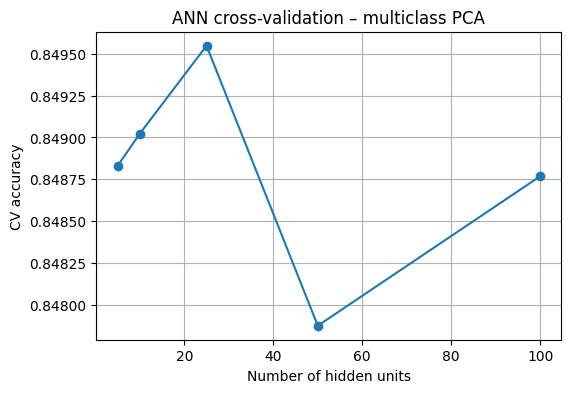


=== MULTICLASS PCA ANN – Final Validation Performance ===
Hidden units: (25,)
Training accuracy:   0.8499
Validation accuracy: 0.8474
Training time:  2.5095 seconds
Prediction time:0.0247 seconds

Classification report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     10685
         1.0       0.00      0.00      0.00       232
         2.0       0.53      0.18      0.27      1767

    accuracy                           0.85     12684
   macro avg       0.47      0.39      0.40     12684
weighted avg       0.80      0.85      0.81     12684



/Users/jp/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jp/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jp/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [117]:
# Multiclass ANN with PCA
best_ann_multi_pca = run_ann_with_cv(
    X_train_multi_pca, y_train_multi,
    X_val_multi_pca,   y_val_multi,
    problem_name="multiclass PCA"
)


=== BINARY PCA ANN – Cross Validation Results ===
Best params: {'mlp__hidden_layer_sizes': (10,)}
Best mean CV accuracy: 0.8506342166475541


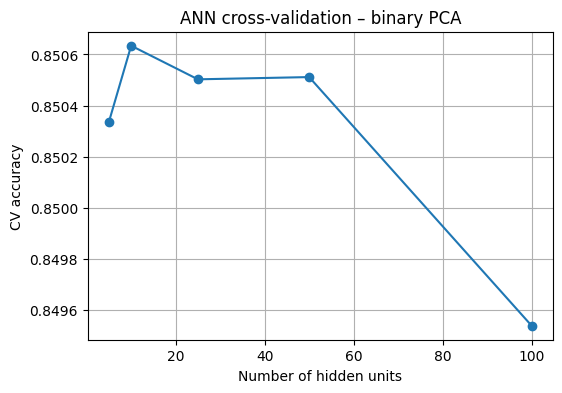


=== BINARY PCA ANN – Final Validation Performance ===
Hidden units: (10,)
Training accuracy:   0.8513
Validation accuracy: 0.8479
Training time:  1.9515 seconds
Prediction time:0.0097 seconds

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.92     10685
           1       0.55      0.18      0.27      1999

    accuracy                           0.85     12684
   macro avg       0.71      0.58      0.59     12684
weighted avg       0.81      0.85      0.81     12684



In [118]:
# Binary ANN with PCA
best_ann_bin_pca = run_ann_with_cv(
    X_train_bin_pca, y_train_bin,
    X_val_bin_pca,   y_val_bin,
    problem_name="binary PCA"
)

## Comparing Models

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = [
    {"problem": "multiclass", "model": "KNN",           "train_acc": 0.8294, "val_acc": 0.8421, "train_time": 0.0197, "pred_time": 0.8945},
    {"problem": "multiclass", "model": "ANN",           "train_acc": 0.8498, "val_acc": 0.8489, "train_time": 3.4667, "pred_time": 0.0033},
    {"problem": "multiclass", "model": "Random Forest", "train_acc": 0.9952, "val_acc": 0.8425, "train_time": 31.277, "pred_time": 1.7439},
    {"problem": "multiclass", "model": "SVM",           "train_acc": 0.8572, "val_acc": 0.8520, "train_time": 9.1494, "pred_time": 0.8760},
    {"problem": "multiclass", "model": "Decision Tree", "train_acc": 0.8493, "val_acc": 0.8478, "train_time": 0.2281, "pred_time": 0.0030},
    {"problem": "multiclass", "model": "Naive Bayes",   "train_acc": 0.8422, "val_acc": 0.8468, "train_time": 0.0063, "pred_time": 0.0008},

    {"problem": "binary",     "model": "KNN",           "train_acc": 0.8501, "val_acc": 0.8439, "train_time": 0.0185, "pred_time": 0.9487},
    {"problem": "binary",     "model": "ANN",           "train_acc": 0.8523, "val_acc": 0.8482, "train_time": 2.3607, "pred_time": 0.0094},
    {"problem": "binary",     "model": "Random Forest", "train_acc": 0.9956, "val_acc": 0.8411, "train_time": 28.8603, "pred_time": 1.5738},
    {"problem": "binary",     "model": "SVM",           "train_acc": 0.8627, "val_acc": 0.8524, "train_time": 7.0488, "pred_time": 0.7621},
    {"problem": "binary",     "model": "Decision Tree", "train_acc": 0.8505, "val_acc": 0.8483, "train_time": 0.2225, "pred_time": 0.0026},
    {"problem": "binary",     "model": "Naive Bayes",   "train_acc": 0.8429, "val_acc": 0.8444, "train_time": 0.0063, "pred_time": 0.0005},
]

df = pd.DataFrame(data)

In [157]:
import numpy as np
import matplotlib.pyplot as plt

def grouped_bar_subplot(ax, df, metric_col, ylabel, title,
                        log_scale=False, show_legend=False):
    models = df["model"].unique()
    problems = ["multiclass", "binary"]
    x = np.arange(len(models))
    width = 0.35  

    for i, problem in enumerate(problems):
        sub = df[df["problem"] == problem].set_index("model").loc[models]
        values = sub[metric_col].values

        bars = ax.bar(
            x + (i - 0.5) * width,
            values,
            width,
            label=problem if show_legend else None,
        )

        # choose number formatting
        if metric_col in ["train_acc", "val_acc"]:
            labels = [f"{v:.3f}" for v in values]   
        else:
            labels = [f"{v:.2f}" for v in values]   

        ax.bar_label(bars, labels=labels, padding=2, fontsize=7, rotation=0)

    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha="right")
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    if log_scale:
        ax.set_yscale("log")

    if show_legend:
        ax.legend()

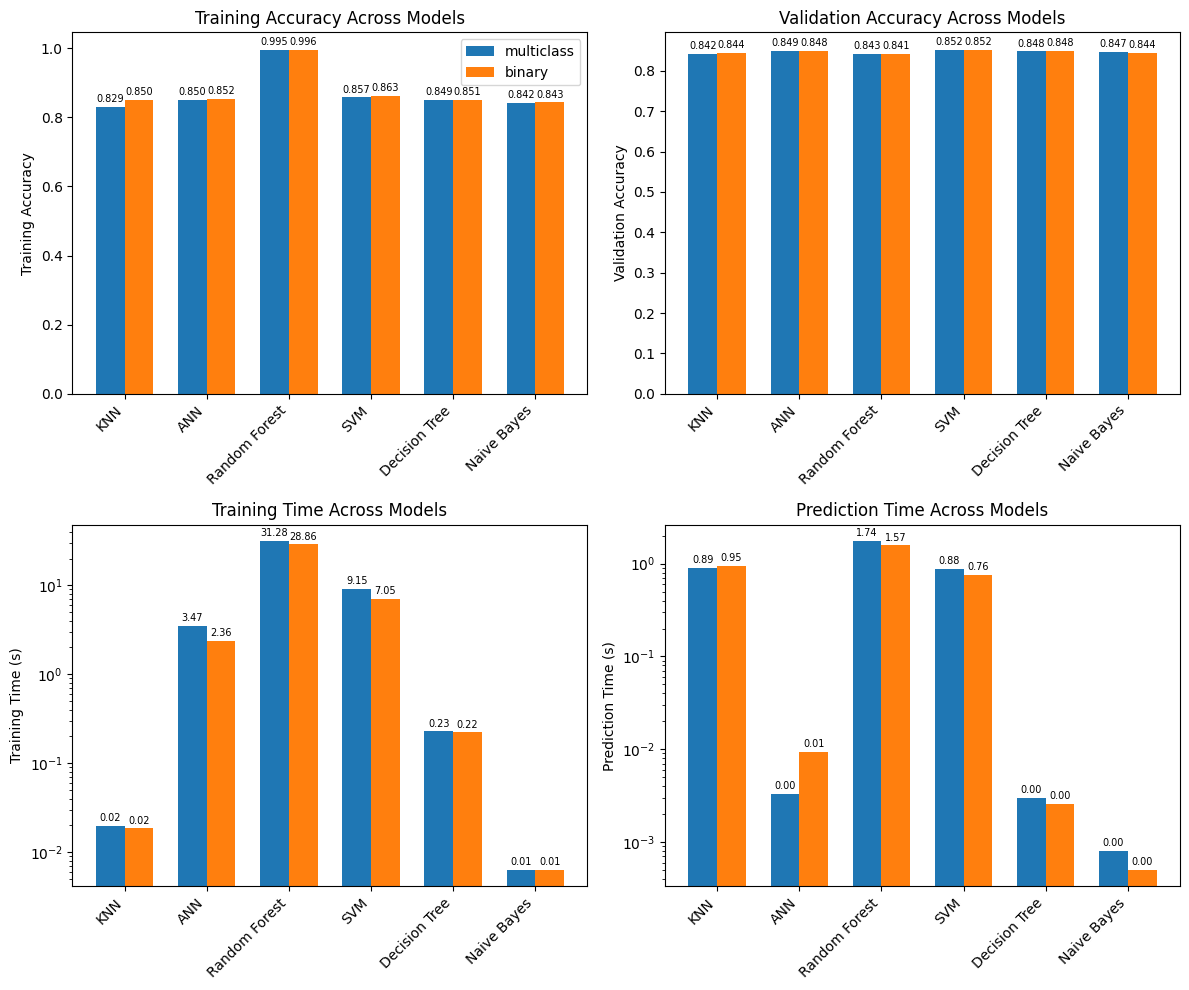

In [158]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # reasonable fixed size

grouped_bar_subplot(
    axes[0, 0],
    df,
    metric_col="train_acc",
    ylabel="Training Accuracy",
    title="Training Accuracy Across Models",
    log_scale=False,
    show_legend=True,   
)

grouped_bar_subplot(
    axes[0, 1],
    df,
    metric_col="val_acc",
    ylabel="Validation Accuracy",
    title="Validation Accuracy Across Models",
    log_scale=False,
    show_legend=False,
)

grouped_bar_subplot(
    axes[1, 0],
    df,
    metric_col="train_time",
    ylabel="Training Time (s)",
    title="Training Time Across Models",
    log_scale=True,
    show_legend=False,
)

grouped_bar_subplot(
    axes[1, 1],
    df,
    metric_col="pred_time",
    ylabel="Prediction Time (s)",
    title="Prediction Time Across Models",
    log_scale=True,
    show_legend=False,
)

fig.tight_layout()
plt.show()

### Dimension Reduction

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = [
    {"problem": "multiclass", "model": "KNN",
     "train_acc": 0.8474, "val_acc": 0.8439,
     "train_time": 0.0551, "pred_time": 1.0709},

    {"problem": "multiclass", "model": "ANN",
     "train_acc": 0.8499, "val_acc": 0.8474,
     "train_time": 2.1875, "pred_time": 0.0055},

    {"problem": "multiclass", "model": "Random Forest",
     "train_acc": 0.9952, "val_acc": 0.8436,
     "train_time": 111.0577, "pred_time": 0.7755},

    {"problem": "multiclass", "model": "SVM",
     "train_acc": 0.8498, "val_acc": 0.8492,
     "train_time": 6.7326, "pred_time": 0.6983},

    {"problem": "multiclass", "model": "Decision Tree",
     "train_acc": 0.8445, "val_acc": 0.8419,
     "train_time": 1.0251, "pred_time": 0.0062},

    {"problem": "multiclass", "model": "Naive Bayes",
     "train_acc": 0.8427, "val_acc": 0.8476,
     "train_time": 0.0049, "pred_time": 0.0003},

    # --------- BINARY ---------
    {"problem": "binary", "model": "KNN",
     "train_acc": 0.8503, "val_acc": 0.8435,
     "train_time": 0.0551, "pred_time": 0.7672},

    {"problem": "binary", "model": "ANN",
     "train_acc": 0.8513, "val_acc": 0.8479,
     "train_time": 2.1923, "pred_time": 0.0201},

    {"problem": "binary", "model": "Random Forest",
     "train_acc": 0.9956, "val_acc": 0.8426,
     "train_time": 163.9508, "pred_time": 1.1003},

    {"problem": "binary", "model": "SVM",
     "train_acc": 0.8542, "val_acc": 0.8512,
     "train_time": 5.1595, "pred_time": 0.6161},

    {"problem": "binary", "model": "Decision Tree",
     "train_acc": 0.8447, "val_acc": 0.8435,
     "train_time": 0.9665, "pred_time": 0.0046},

    {"problem": "binary", "model": "Naive Bayes",
     "train_acc": 0.8440, "val_acc": 0.8448,
     "train_time": 0.0051, "pred_time": 0.0004},
]

df = pd.DataFrame(data)

In [172]:
def grouped_bar_subplot(ax, df, metric_col, ylabel, title,
                        log_scale=False, show_legend=False):
    models = df["model"].unique()
    problems = ["multiclass", "binary"]
    x = np.arange(len(models))
    width = 0.35  

    for i, problem in enumerate(problems):
        sub = df[df["problem"] == problem].set_index("model").loc[models]
        values = sub[metric_col].values

        bars = ax.bar(
            x + (i - 0.5) * width,
            values,
            width,
            label=problem if show_legend else None,
        )

        if metric_col in ["train_acc", "val_acc"]:
            labels = [f"{v:.3f}" for v in values]   
        else:
            labels = [f"{v:.2f}" for v in values]   

        ax.bar_label(bars, labels=labels, padding=2, fontsize=7, rotation=0)

    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha="right")
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    if log_scale:
        ax.set_yscale("log")

    if show_legend:
        ax.legend()

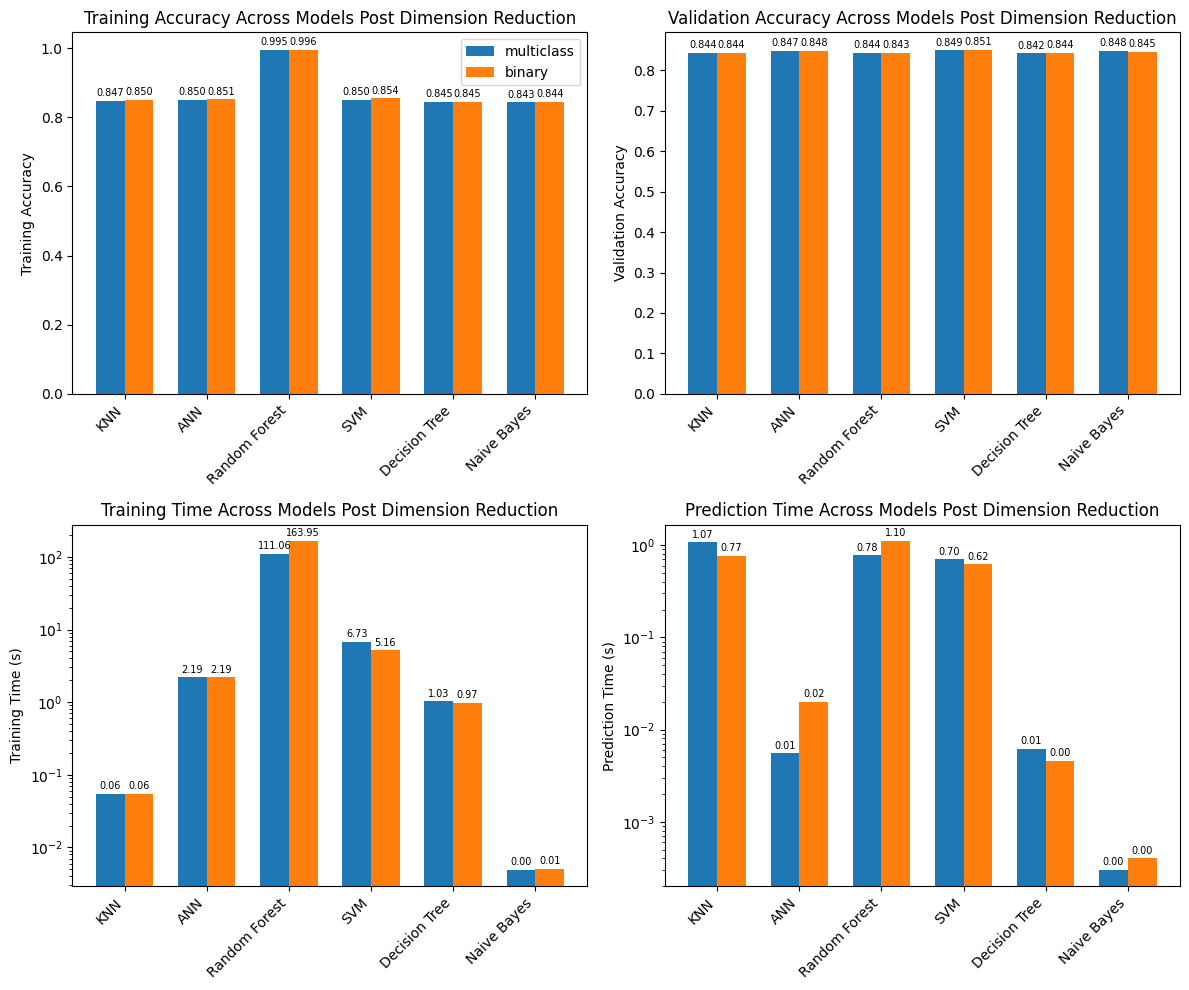

In [173]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

grouped_bar_subplot(
    axes[0, 0],
    df,
    metric_col="train_acc",
    ylabel="Training Accuracy",
    title="Training Accuracy Across Models Post Dimension Reduction",
    log_scale=False,
    show_legend=True,    
)

grouped_bar_subplot(
    axes[0, 1],
    df,
    metric_col="val_acc",
    ylabel="Validation Accuracy",
    title="Validation Accuracy Across Models Post Dimension Reduction",
    log_scale=False,
    show_legend=False,
)

grouped_bar_subplot(
    axes[1, 0],
    df,
    metric_col="train_time",
    ylabel="Training Time (s)",
    title="Training Time Across Models Post Dimension Reduction",
    log_scale=True,
    show_legend=False,
)

grouped_bar_subplot(
    axes[1, 1],
    df,
    metric_col="pred_time",
    ylabel="Prediction Time (s)",
    title="Prediction Time Across Models Post Dimension Reduction",
    log_scale=True,
    show_legend=False,
)

fig.tight_layout()
plt.show()